# DATATON 2022 - BANCOLOMBIA

## **Integrante:**
- Wuilson Adolfo Estacio

## Importar librerias

In [1]:
# pip install gensim

In [2]:
# pip install nltk

In [3]:
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.stem.porter import *
from nltk import FreqDist
from timeit import default_timer as timer
import nltk
import gc

In [4]:
os.chdir('D:\\Will_Analisis\\')
analysis_dir = os.getcwd()
data_dir= os.path.join(analysis_dir,'dataton\\Datos\\')
result_dir= os.path.join(analysis_dir,'dataton\\Resultados\\')

In [5]:
# from google.colab import drive
# drive.mount("/content/gdrive")

## Cargar datos

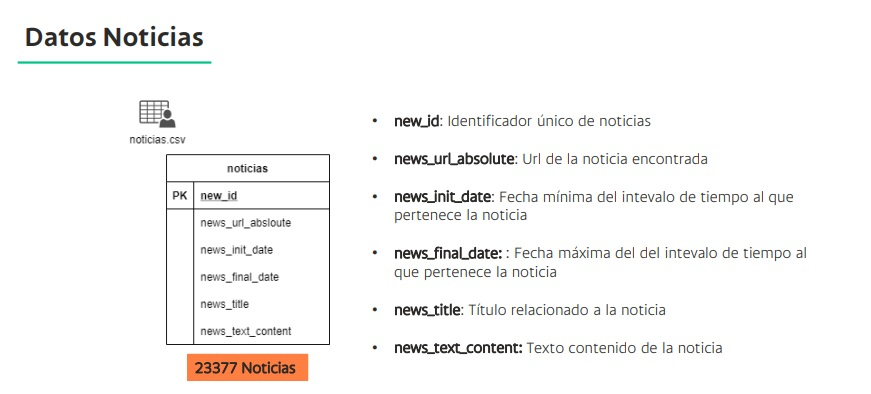

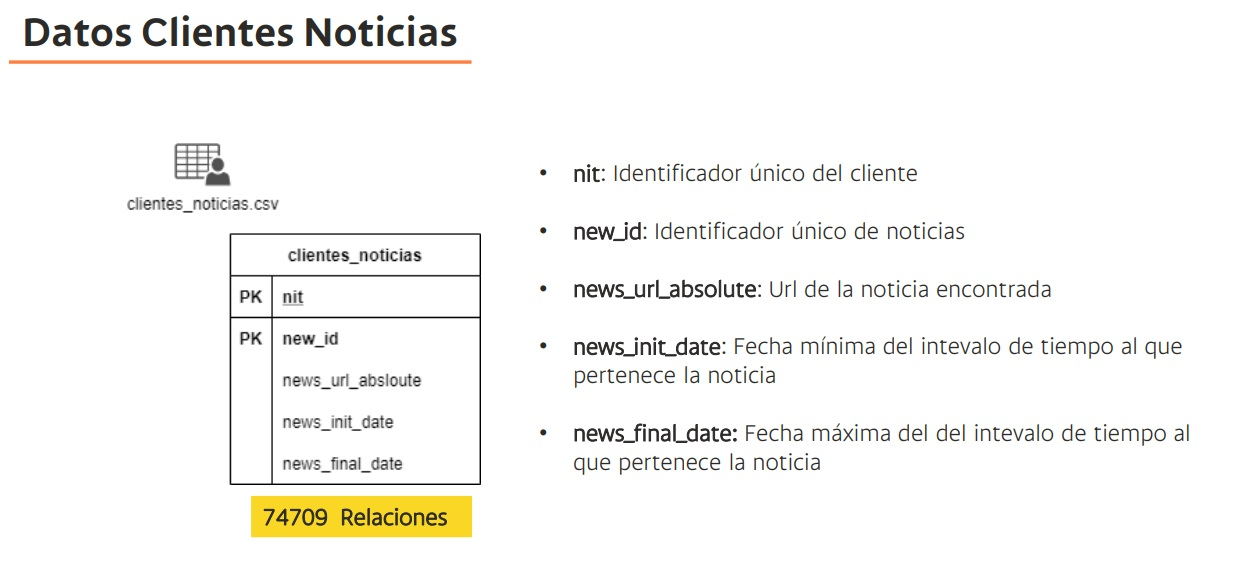

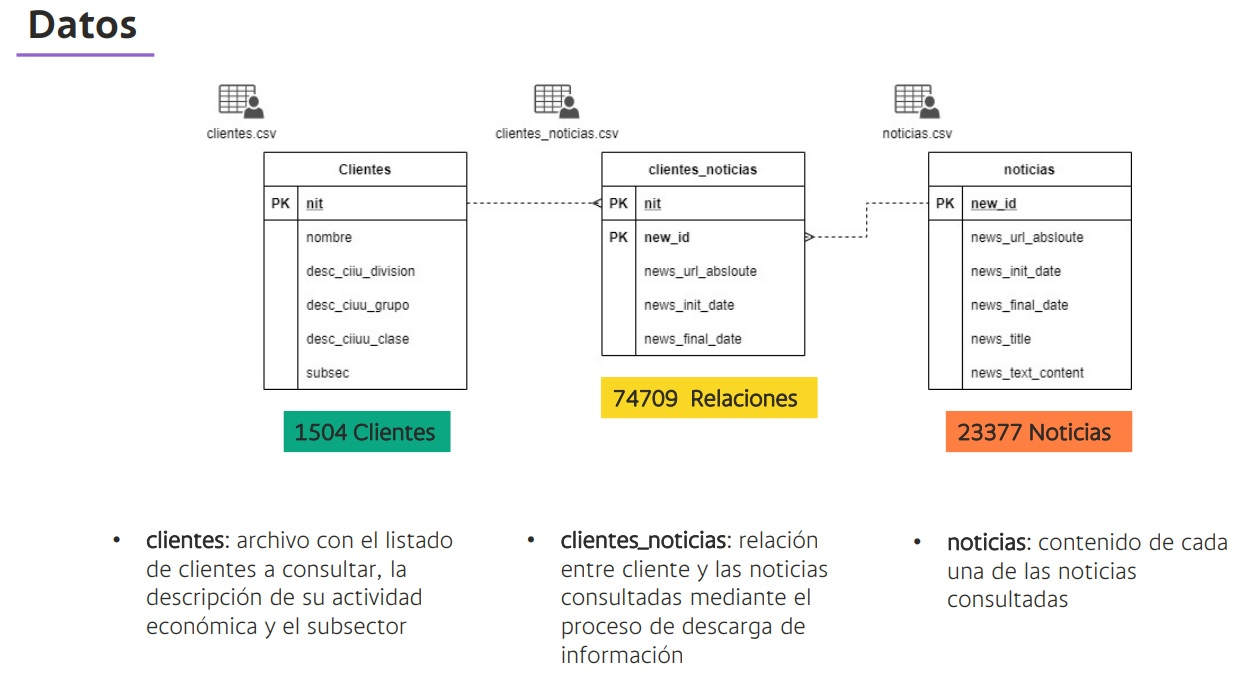

In [6]:
# Clientes=pd.read_csv("gdrive/MyDrive/Dataton2022/clientes.csv")
# Clientes_noticias=pd.read_csv("gdrive/MyDrive/Dataton2022/clientes_noticias.csv")
# Noticias=pd.read_csv("gdrive/MyDrive/Dataton2022/noticias.csv")

In [7]:
Clientes=pd.read_csv(os.path.join(data_dir,"clientes.csv"), sep=",")  # encoding="latin-1"
Clientes_noticias=pd.read_csv(os.path.join(data_dir,"clientes_noticias.csv"), sep=",") 
Noticias=pd.read_csv(os.path.join(data_dir,"noticias.csv"), sep=",") 

In [8]:
#Para ver el tamaño de la matrices
print(Clientes.shape)
print(Clientes_noticias.shape)
print(Noticias.shape)

(1507, 6)
(74709, 5)
(23377, 6)


In [9]:
Noticias.dtypes

news_id              object
news_url_absolute    object
news_init_date       object
news_final_date      object
news_title           object
news_text_content    object
dtype: object

### Exploracion de datos

## Exploracion de Datos

In [10]:
#Para ver el tamaño de la matrices
print(Clientes.shape)
print(Clientes_noticias.shape)
print(Noticias.shape)

(1507, 6)
(74709, 5)
(23377, 6)


Seleccionar las primera 30 noticias


In [11]:
indice_prueba_noticias=-1
Primeras_noticias= Noticias[:indice_prueba_noticias][['news_text_content']]
Primeras_noticias['index'] = Primeras_noticias.index
Primeras_noticias['news_id']=Noticias[:indice_prueba_noticias][['news_id']]
Muestra_primeras_30_noticias= Primeras_noticias
Muestra_primeras_30_noticias

,news_text_content,index,news_id
0,"Este martes, 2 de agosto, el dolar alcanzo un ...",0,news10006
1,No hay nada mas permanente que lo temporal y a...,1,news10011
2,El equipo de empalme del gobierno del presiden...,2,news10015
3,?Buscas opciones para el envio de dinero de Es...,3,news10028
4,?Buscas opciones para el envio de dinero de Es...,4,news10029
...,...,...,...
23371,El Instituto Nacional de Estadistica e Informa...,23371,news99982
23372,"Por: Mesa Mas La Guajira. En La Guajira, el 54...",23372,news99983
23373,A pesar de que se enfrentan a multiples riesgo...,23373,news99989
23374,"Durante los anos 60 y 70 del siglo pasado, soc...",23374,news99991


## Limpieza de datos

In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ec4778g\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ec4778g\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
print(WordNetLemmatizer().lemmatize('went', pos = 'v')) # past tense to present tense

KeyboardInterrupt: 

Ejemplo de SnowballStemmer (existe mas funciones que pueden recortar mas palabras)

In [ ]:
stemmer = SnowballStemmer(language="spanish") #Snowball devuelve la raiz de la palabra

**Se hace un preprocessing de datos. Se filtran las stopwords (palabras que no aportan nada) y se reescribe cada palabra usando su raiz**

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = [lemmatize_stemming(token) for token in gensim.utils.simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2]
    return result

## Diccionarios de Categorizacion

**Se crea un diccionario con las palabras mas relevantes de cada Categoría**

In [ ]:
Diccionario_categorias={"Macroeconomia":{"macroeconomia",
                                         "Produccion", 
                                        "Desempleo", 
                                        "Inflacion", 
                                        "Inversión", 
                                        "Balanza", 
                                        "Pagos",
                                        "Gasto", 
                                        "Publico",
                                        "Tasa",
                                        "Interes", 
                                        "Consumo",
                                        "PIB",
                                        "Consumidores",
                                         "contabilidad"},
                        "Sostenibilidad":{"Sostenibilidad",
                                          "Arbol",
                                          "Ambiente",
                                          "Biodegradables",
                                          "Biodiversidad",
                                          "Bio",
                                          "Tierra",
                                          "Animales",
                                          "Plantas",
                                          "Oceano",
                                          "Naturaleza"},
                        "Innovacion":{"innovacion",
                                      "Futuro",
                                      "Tecnologia",
                                      "Avance",
                                      "Automatizacion",
                                      "Avance",
                                      "Adelanto",
                                      "Desarrollo",
                                      "Creatividad"},
                        "Regulaciones":{"regulaciones",
                                        "reglas",
                                        "normas",
                                        "leyes",
                                        "decretos",
                                        "politicas",
                                        "funcionamiento",
                                        "mercado",
                                        "disposiciones",
                                        "cumplir",
                                        "competitividad",
                                        "lineamientos",
                                        "relaciones",
                                        "administracion",
                                        "beneficio"
                                        },
                        "Alianzas": {"alianza",
                                     "acuerdo",
                                     "arreglo",
                                     "asociacion",
                                     "ayuda",
                                     "coalicion",
                                     "comunion",
                                     "eje",
                                     "enlace",
                                     "federacion",
                                     "empresas",
                                     "lazo",
                                     "tratado",
                                     "conexion",
                                     "convenio"
                                     },
                        "Reputacion": {"reputacion",
                                       "experiencia",
                                       "practicas",
                                       "responsabilidad",
                                       "politicas",
                                       "resultados",
                                       "calidad",
                                       "oferta",
                                       "moral",
                                       "bienestar",
                                       "organizacion"
                                       },
                        "Otra": {"juegos",
                                 "sexo",
                                 "piramide",
                                 "aprendizaje",
                                 "lectura"},
                        "Descartable": {}
                    }

**Se crea un diccionario con las palabras filtradas usando la funcion preprocess usada anterioemente**

In [ ]:
Diccionario_procesado={}
for categoria, item in Diccionario_categorias.items():
  categoria_procesada=[]
  for palabra in item:
    palabra_procesada=preprocess(palabra)
    categoria_procesada.append(palabra_procesada[0])
  Diccionario_procesado[categoria]=set(categoria_procesada)
Diccionario_procesado


{'Macroeconomia': {'balanz',
  'consum',
  'consumidor',
  'contabil',
  'desemple',
  'gast',
  'inflacion',
  'inter',
  'inversion',
  'macroeconomi',
  'pag',
  'pib',
  'produccion',
  'public',
  'tas'},
 'Sostenibilidad': {'ambient',
  'animal',
  'arbol',
  'bio',
  'biodegrad',
  'biodivers',
  'naturalez',
  'ocean',
  'plant',
  'sostenibil',
  'tierr'},
 'Innovacion': {'adelant',
  'automatizacion',
  'avanc',
  'creativ',
  'desarroll',
  'futur',
  'innovacion',
  'tecnologi'},
 'Regulaciones': {'administracion',
  'benefici',
  'competit',
  'cumpl',
  'decret',
  'disposicion',
  'funcion',
  'ley',
  'lineamient',
  'merc',
  'norm',
  'polit',
  'regl',
  'regul',
  'relacion'},
 'Alianzas': {'acuerd',
  'alianz',
  'arregl',
  'asociacion',
  'ayud',
  'coalicion',
  'comunion',
  'conexion',
  'conveni',
  'eje',
  'empres',
  'enlac',
  'federacion',
  'laz',
  'trat'},
 'Reputacion': {'bienest',
  'calid',
  'experient',
  'moral',
  'ofert',
  'organizacion',
  '

## Crear categorización

Observaciones importantes de la función **hallar_puntajes_categorias:**


**hallar_puntajes_categorias:** halla la frecuencia realtiva de las palabras correspondientes a las diferentes categorias (Macroeconomia, Sostenibilidad, Innovación, Regulaciones, Alianzas, Reputación ) de las palabras ya previamente procesadas con **stremmer**

In [ ]:
def hallar_puntajes_categorias(palabras_procesadas):
  global contador
  frecuencia=FreqDist(palabras_procesadas)
  Puntajes={}
  for categoria in Diccionario_procesado.keys():
    puntaje=0
    for palabra in frecuencia.keys():
      if palabra in Diccionario_procesado[categoria]:
        puntos=frecuencia[palabra]/len(palabras_procesadas)
        puntaje+=puntos
    Puntajes[categoria]=puntaje
  for categoria in Diccionario_procesado.keys():
    Frases_procesadas.loc[contador, [categoria]]=Puntajes[categoria]
  if Puntajes.get(max(Puntajes, key=Puntajes.get))>0.01: 
    Frases_procesadas.loc[contador,"categoria"]=max(Puntajes, key=Puntajes.get)
  else:
    Frases_procesadas.loc[contador,"categoria"]="Otra"
  contador+=1

In [ ]:
Diccionario_procesado.keys()

dict_keys(['Macroeconomia', 'Sostenibilidad', 'Innovacion', 'Regulaciones', 'Alianzas', 'Reputacion', 'Otra', 'Descartable'])

**Se crea la tabla donde se asigna un puntaje entre 0 y 1 a cada categoria, para cada noticia**

In [ ]:
processed_docs = Muestra_primeras_30_noticias['news_text_content'].apply(preprocess)
processed_docs

0        [este, mart, agost, dol, alcanz, preci, maxim,...
1        [hay, nad, mas, permanent, que, temporal, asi,...
2        [equip, empalm, del, gobiern, del, president, ...
3        [busc, opcion, par, envi, diner, estad, unid, ...
4        [busc, opcion, par, envi, diner, estad, unid, ...
                               ...                        
23371    [institut, nacional, estadist, informat, inei,...
23372    [por, mes, mas, guajir, guajir, los, ocup, enc...
23373    [pes, que, enfrent, multipl, riesg, por, activ...
23374    [durant, los, anos, del, sigl, pas, sociolog, ...
23375    [comport, economi, los, ultim, mes, hac, que, ...
Name: news_text_content, Length: 23376, dtype: object

In [ ]:
start = timer()
Frases_procesadas = processed_docs.to_frame()
for categoria in Diccionario_procesado.keys():
  Frases_procesadas[categoria]=np.empty((len(Frases_procesadas),1))
contador=0
Frases_procesadas["categoria"]=np.empty((len(Frases_procesadas),1))
Frases_procesadas['news_text_content'].apply(hallar_puntajes_categorias)
Frases_procesadas
end = timer()
print(end - start)


125.73323270000003


In [ ]:
Frases_procesadas["news_url_absolute"]=Noticias["news_url_absolute"]
Frases_procesadas.head(3)

,news_text_content,Macroeconomia,Sostenibilidad,Innovacion,Regulaciones,Alianzas,Reputacion,Otra,Descartable,categoria,news_url_absolute
0,"[este, mart, agost, dol, alcanz, preci, maxim,...",0.040000,0.0,0.000000,0.020000,0.000000,0.000000,0.0,0.0,Macroeconomia,https://www.bluradio.com/economia/precio-dolar...
1,"[hay, nad, mas, permanent, que, temporal, asi,...",0.010417,0.0,0.002604,0.005208,0.013021,0.002604,0.0,0.0,Alianzas,https://www.semana.com/economia/macroeconomia/...
2,"[equip, empalm, del, gobiern, del, president, ...",0.011494,0.0,0.000000,0.022989,0.000000,0.015326,0.0,0.0,Regulaciones,https://elcomercio.pe/respuestas/que/gustavo-p...


In [ ]:
def url_noticias(url):
  global contador
  url=url.lower()
  if url.find("macroecono")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Macroeconomia"
  elif url.find("sostenibi")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Sostenibilidad"
  elif url.find("innova")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Innovacion"
  elif url.find("regula")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Regulaciones"
  elif url.find("alianza")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Alianzas"
  elif url.find("reputa")!=-1:
    Frases_procesadas.loc[contador,"categoria"]="Reputacion"
  contador+=1

In [ ]:
contador=0
Frases_procesadas["news_url_absolute"].apply(url_noticias)
Frases_procesadas.head(3)

,news_text_content,Macroeconomia,Sostenibilidad,Innovacion,Regulaciones,Alianzas,Reputacion,Otra,Descartable,categoria,news_url_absolute
0,"[este, mart, agost, dol, alcanz, preci, maxim,...",0.040000,0.0,0.000000,0.020000,0.000000,0.000000,0.0,0.0,Macroeconomia,https://www.bluradio.com/economia/precio-dolar...
1,"[hay, nad, mas, permanent, que, temporal, asi,...",0.010417,0.0,0.002604,0.005208,0.013021,0.002604,0.0,0.0,Macroeconomia,https://www.semana.com/economia/macroeconomia/...
2,"[equip, empalm, del, gobiern, del, president, ...",0.011494,0.0,0.000000,0.022989,0.000000,0.015326,0.0,0.0,Regulaciones,https://elcomercio.pe/respuestas/que/gustavo-p...


In [ ]:
Frases_procesadas["news_id"]=Primeras_noticias["news_id"]
Frases_procesadas

,news_text_content,Macroeconomia,Sostenibilidad,Innovacion,Regulaciones,Alianzas,Reputacion,Otra,Descartable,categoria,news_url_absolute,news_id
0,"[este, mart, agost, dol, alcanz, preci, maxim,...",0.040000,0.000000,0.000000,0.020000,0.000000,0.000000,0.0,0.0,Macroeconomia,https://www.bluradio.com/economia/precio-dolar...,news10006
1,"[hay, nad, mas, permanent, que, temporal, asi,...",0.010417,0.000000,0.002604,0.005208,0.013021,0.002604,0.0,0.0,Macroeconomia,https://www.semana.com/economia/macroeconomia/...,news10011
2,"[equip, empalm, del, gobiern, del, president, ...",0.011494,0.000000,0.000000,0.022989,0.000000,0.015326,0.0,0.0,Regulaciones,https://elcomercio.pe/respuestas/que/gustavo-p...,news10015
3,"[busc, opcion, par, envi, diner, estad, unid, ...",0.012448,0.000000,0.000000,0.010373,0.012448,0.000000,0.0,0.0,Alianzas,https://www.lanacion.com.ar/estados-unidos/cua...,news10028
4,"[busc, opcion, par, envi, diner, estad, unid, ...",0.014463,0.000000,0.000000,0.010331,0.012397,0.000000,0.0,0.0,Macroeconomia,https://www.lanacion.com.ar/estados-unidos/com...,news10029
...,...,...,...,...,...,...,...,...,...,...,...,...
23371,"[institut, nacional, estadist, informat, inei,...",0.013699,0.003425,0.000000,0.003425,0.000000,0.006849,0.0,0.0,Macroeconomia,https://infomercado.pe/indice-de-precios-al-pr...,news99982
23372,"[por, mes, mas, guajir, guajir, los, ocup, enc...",0.014587,0.000000,0.004862,0.012966,0.008104,0.001621,0.0,0.0,Macroeconomia,https://www.tuuputchika.com/2022/08/07/como-av...,news99983
23373,"[pes, que, enfrent, multipl, riesg, por, activ...",0.004320,0.004320,0.000000,0.004320,0.010799,0.002160,0.0,0.0,Alianzas,https://www.publimetro.com.mx/nacional/2022/08...,news99989
23374,"[durant, los, anos, del, sigl, pas, sociolog, ...",0.022573,0.004515,0.000000,0.004515,0.002257,0.004515,0.0,0.0,Macroeconomia,https://www.laopinion.com.co/columnistas/la-de...,news99991


In [ ]:
Frases_procesadas["news_title"]=Noticias[:indice_prueba_noticias][['news_title']]
Frases_procesadas["news_title"] = Frases_procesadas["news_title"].str.upper()
Frases_procesadas['Contenido_noticias']=Noticias[:indice_prueba_noticias][['news_text_content']]
Frases_procesadas.head(2)

,news_text_content,Macroeconomia,Sostenibilidad,Innovacion,Regulaciones,Alianzas,Reputacion,Otra,Descartable,categoria,news_url_absolute,news_id,news_title,Contenido_noticias
0,"[este, mart, agost, dol, alcanz, preci, maxim,...",0.040000,0.0,0.000000,0.020000,0.000000,0.000000,0.0,0.0,Macroeconomia,https://www.bluradio.com/economia/precio-dolar...,news10006,PRECIO DOLAR HOY: LA COTIZACION DE LA DIVISA A...,"Este martes, 2 de agosto, el dolar alcanzo un ..."
1,"[hay, nad, mas, permanent, que, temporal, asi,...",0.010417,0.0,0.002604,0.005208,0.013021,0.002604,0.0,0.0,Macroeconomia,https://www.semana.com/economia/macroeconomia/...,news10011,ES CIERTO: EL PRESIDENTE GUSTAVO PETRO QUIERE ...,No hay nada mas permanente que lo temporal y a...


In [ ]:
Clientes.head(2)

,nit,nombre,desc_ciiu_division,desc_ciuu_grupo,desc_ciiuu_clase,subsec
0,805027024,SUPERMERCADO LA GRAN COLOMBIA SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS
1,890100026,CAMAGUEY SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS


In [ ]:
# se selecionan las palabras claves del sector de los cleintes
Clientes["Sec1"] = Clientes['subsec'].apply(preprocess)
Clientes["Sec2"] = Clientes['desc_ciiuu_clase'].apply(preprocess)
Clientes["Sec3"] = Clientes['desc_ciuu_grupo'].apply(preprocess)
Clientes["Sector"]=Clientes["Sec1"]+Clientes["Sec2"]+Clientes["Sec3"]
Clientes["Sector"]=Clientes["Sector"].apply(lambda x:set(x))
# Clientes.head()

In [ ]:
def Clientes_noticias_sector(Frases_procesadas):
  Participacion="No aplica"
  for palabra in Clientes.loc[i]["Sector"]:
    if palabra in Frases_procesadas:
      Participacion="Sector"
      break
  return Participacion
def Clientes_noticias_cliente(Frases_procesadas):
  if Clientes.loc[i]["nombre"] in Frases_procesadas.upper():
    Participacion="Cliente"
    return Participacion

def cliente_sector(row):
  if row['clientes2']=='Cliente':
    return 'Cliente'
  elif row['clientes1']=='Sector':
    return 'Sector'
  else:
    return 'No aplica'
Final = pd.DataFrame(columns=["nit","news_id","participacion","categoria"])
for i in range(len(Clientes)):
  Frases_procesadas["clientes1"]=Frases_procesadas["news_text_content"].apply(Clientes_noticias_sector)
  Frases_procesadas["clientes2"]=Frases_procesadas["Contenido_noticias"].apply(Clientes_noticias_cliente)
  Frases_procesadas['participacion']=Frases_procesadas.apply(lambda row: cliente_sector(row), axis=1 )
  Frases_procesadas["nit"]=Clientes.loc[i]["nit"]
  Final=pd.concat([Final, Frases_procesadas[["nit","news_id","participacion","categoria"]]], ignore_index=True)
Final["nombre_equipo"]="dataWarrior"


In [ ]:
Final.dtypes

nit              object
news_id          object
participacion    object
categoria        object
nombre_equipo    object
dtype: object

In [ ]:
Final=Final[["nombre_equipo","nit","news_id","participacion","categoria"]]
Final

,nombre_equipo,nit,news_id,participacion,categoria
0,dataWarrior,805027024,news10006,No aplica,Macroeconomia
1,dataWarrior,805027024,news10011,No aplica,Macroeconomia
2,dataWarrior,805027024,news10015,Sector,Regulaciones
3,dataWarrior,805027024,news10028,No aplica,Alianzas
4,dataWarrior,805027024,news10029,No aplica,Macroeconomia
...,...,...,...,...,...
75345,dataWarrior,891102723,news10173,Sector,Otra
75346,dataWarrior,891102723,news10176,Sector,Macroeconomia
75347,dataWarrior,891102723,news10180,Sector,Otra
75348,dataWarrior,891102723,news10188,Sector,Macroeconomia


In [ ]:
Final.to_csv(os.path.join(result_dir,"Final_Dataton.csv"), encoding='utf-8', sep=';')

In [ ]:
def selecion_clientes(news_url):
    a=news_url.find("//")
    b=news_url[a+2:]
    c=b.find("/")
    return b[:c]
Noticias['Fuente']=Noticias['news_url_absolute'].apply(selecion_clientes)   

In [ ]:
print(Noticias.groupby('Fuente').size().sort_values(ascending = (False)).sum())

23377


In [ ]:
peso_noticias=Noticias.groupby('Fuente').size().sort_values(ascending = (False))*100/Noticias.groupby('Fuente').size().sort_values(ascending = (False)).sum()
peso_noticias=pd.DataFrame(peso_noticias,columns={'Peso_Noticia'})
peso_noticias.reset_index(inplace=True)
peso_noticias

,Fuente,Peso_Noticia
0,www.semana.com,7.644266
1,www.larepublica.co,3.944048
2,www.eltiempo.com,3.204004
3,www.elcolombiano.com,2.600847
4,www.bnamericas.com,2.374128
...,...,...
1981,www.cadena100.es,0.004278
1982,miredvista.co,0.004278
1983,www.ejeprime.com,0.004278
1984,minmujeryeg.gob.cl,0.004278


In [ ]:
Noticias=pd.merge(Noticias,peso_noticias,how='inner',on='Fuente')
Noticias.shape

(23377, 8)

In [ ]:
print(Noticias.groupby('Fuente').size().sort_values(ascending = (False)))

Fuente
www.semana.com          1787
www.larepublica.co       922
www.eltiempo.com         749
www.elcolombiano.com     608
www.bnamericas.com       555
                        ... 
www.cadena100.es           1
miredvista.co              1
www.ejeprime.com           1
minmujeryeg.gob.cl         1
www.defensa.gob.es         1
Length: 1986, dtype: int64


In [ ]:
Final1=pd.merge(Final,Noticias[['news_id','Fuente','Peso_Noticia']],how='left', on='news_id')
Final1=Final1[["nombre_equipo","nit","news_id","participacion","categoria","Fuente","Peso_Noticia"]]
Final1.rename(columns={'Fuente':'Fuente_noticia'})
Final1.shape

(75350, 7)

In [ ]:
Final1.categoria.unique()

array(['Macroeconomia', 'Regulaciones', 'Alianzas', 'Sostenibilidad',
       'Innovacion', 'Reputacion', 'Otra'], dtype=object)

In [ ]:
Final1.isnull().sum().sort_values(ascending=False,)

nombre_equipo    0
nit              0
news_id          0
participacion    0
categoria        0
Fuente           0
Peso_Noticia     0
dtype: int64

In [ ]:
print(Final1.groupby('Fuente').size())

Fuente
cronica.uno                    1507
elcomercio.pe                  3014
es.investing.com               1507
expansion.mx                   1507
lexlatin.com                   3014
m.vanguardia.com               3014
www.bbva.com                  13563
www.bloomberglinea.com         4521
www.bluradio.com               1507
www.bnamericas.com             3014
www.computerweekly.com         1507
www.diariodemallorca.es        1507
www.efe.com                    1507
www.eldiarioar.com             1507
www.eltiempo.com               1507
www.lanacion.com.ar            7535
www.laopinion.com.co           9042
www.pv-magazine.es             1507
www.radiomontecarlo.com.uy     6028
www.semana.com                 3014
www.swissinfo.ch               4521
dtype: int64


In [ ]:
print(Final1.groupby('participacion').size())

participacion
Cliente          2
No aplica    34088
Sector       41260
dtype: int64


In [ ]:
dic_conteo = {
    'categoria' : ['Macroeconomia', 'Innovación', 'Alianzas', 'Sostenibilidad',
       'Reputación', 'Regulaciones','Otra'],
    'Categoria': [2,1.8,1.7,1.5,1.4,1.2,0.5]}
dic_conteo=pd.DataFrame(dic_conteo)
dic_conteo

,categoria,Categoria
0,Macroeconomia,2.0
1,Innovación,1.8
2,Alianzas,1.7
3,Sostenibilidad,1.5
4,Reputación,1.4
5,Regulaciones,1.2
6,Otra,0.5


In [ ]:
dic_participacion = {
    'participacion' : ['Cliente', 'Sector', 'No aplica'],
    'peso': [10,4,0]}
dic_participacion=pd.DataFrame(dic_participacion)
dic_participacion

,participacion,peso
0,Cliente,10
1,Sector,4
2,No aplica,0


In [ ]:
Final1=pd.merge(Final1,dic_conteo,how='left',on='categoria')
Final1=pd.merge(Final1,dic_participacion,how='inner',on='participacion')
Final1.head(5)

,nombre_equipo,nit,news_id,participacion,categoria,Fuente,Peso_Noticia,Categoria,peso
0,dataWarrior,805027024,news10006,No aplica,Macroeconomia,www.bluradio.com,0.774265,2.0,0
1,dataWarrior,805027024,news10011,No aplica,Macroeconomia,www.semana.com,7.644266,2.0,0
2,dataWarrior,805027024,news10028,No aplica,Alianzas,www.lanacion.com.ar,0.440604,1.7,0
3,dataWarrior,805027024,news10029,No aplica,Macroeconomia,www.lanacion.com.ar,0.440604,2.0,0
4,dataWarrior,805027024,news10031,No aplica,Macroeconomia,www.lanacion.com.ar,0.440604,2.0,0


In [ ]:
Final1['Importancia']=Final1['Categoria']*1.5+Final1['Peso_Noticia']+Final1['peso']

In [ ]:
Final1=Final1.sort_values(["nit","Importancia"], ascending = (True, False))
Final1

,nombre_equipo,nit,news_id,participacion,categoria,Fuente,Peso_Noticia,Categoria,peso,Importancia
37327,dataWarrior,800000946,news10011,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266
37331,dataWarrior,800000946,news10030,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266
37340,dataWarrior,800000946,news10080,Sector,Macroeconomia,www.swissinfo.ch,1.407366,2.0,4,8.407366
37366,dataWarrior,800000946,news10168,Sector,Alianzas,www.laopinion.com.co,1.715361,1.7,4,8.265361
37345,dataWarrior,800000946,news10105,Sector,Macroeconomia,www.bloomberglinea.com,1.030928,2.0,4,8.030928
...,...,...,...,...,...,...,...,...,...,...
21956,dataWarrior,901576411,news10064,No aplica,Innovacion,www.bbva.com,0.325106,NaN,0,NaN
21957,dataWarrior,901576411,news10068,No aplica,Reputacion,www.bbva.com,0.325106,NaN,0,NaN
21966,dataWarrior,901576411,news10112,No aplica,Innovacion,www.bnamericas.com,2.374128,NaN,0,NaN
21975,dataWarrior,901576411,news10152,No aplica,Innovacion,www.computerweekly.com,0.124054,NaN,0,NaN


In [ ]:
nits=Final1.groupby('nit').size().index
len(nits)

1507

In [ ]:
del Clientes
del Clientes_noticias
del Noticias
del Final
del peso_noticias
del dic_conteo
gc.collect()

30

In [ ]:
Final1["recomendacion"]=np.zeros(len(Final1))
Final1

,nombre_equipo,nit,news_id,participacion,categoria,Fuente,Peso_Noticia,Categoria,peso,Importancia,recomendacion
37327,dataWarrior,800000946,news10011,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,0.0
37331,dataWarrior,800000946,news10030,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,0.0
37340,dataWarrior,800000946,news10080,Sector,Macroeconomia,www.swissinfo.ch,1.407366,2.0,4,8.407366,0.0
37366,dataWarrior,800000946,news10168,Sector,Alianzas,www.laopinion.com.co,1.715361,1.7,4,8.265361,0.0
37345,dataWarrior,800000946,news10105,Sector,Macroeconomia,www.bloomberglinea.com,1.030928,2.0,4,8.030928,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21956,dataWarrior,901576411,news10064,No aplica,Innovacion,www.bbva.com,0.325106,NaN,0,NaN,0.0
21957,dataWarrior,901576411,news10068,No aplica,Reputacion,www.bbva.com,0.325106,NaN,0,NaN,0.0
21966,dataWarrior,901576411,news10112,No aplica,Innovacion,www.bnamericas.com,2.374128,NaN,0,NaN,0.0
21975,dataWarrior,901576411,news10152,No aplica,Innovacion,www.computerweekly.com,0.124054,NaN,0,NaN,0.0


In [ ]:
Final_boolean=Final1.groupby('news_id').size().index
nits=Final1.groupby('nit').size().index
numeros=list(np.arange(len(Final_boolean))+1)*len(nits)
Final1["recomendacion"]=numeros
Final1

,nombre_equipo,nit,news_id,participacion,categoria,Fuente,Peso_Noticia,Categoria,peso,Importancia,recomendacion
37327,dataWarrior,800000946,news10011,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,1
37331,dataWarrior,800000946,news10030,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,2
37340,dataWarrior,800000946,news10080,Sector,Macroeconomia,www.swissinfo.ch,1.407366,2.0,4,8.407366,3
37366,dataWarrior,800000946,news10168,Sector,Alianzas,www.laopinion.com.co,1.715361,1.7,4,8.265361,4
37345,dataWarrior,800000946,news10105,Sector,Macroeconomia,www.bloomberglinea.com,1.030928,2.0,4,8.030928,5
...,...,...,...,...,...,...,...,...,...,...,...
21956,dataWarrior,901576411,news10064,No aplica,Innovacion,www.bbva.com,0.325106,NaN,0,NaN,46
21957,dataWarrior,901576411,news10068,No aplica,Reputacion,www.bbva.com,0.325106,NaN,0,NaN,47
21966,dataWarrior,901576411,news10112,No aplica,Innovacion,www.bnamericas.com,2.374128,NaN,0,NaN,48
21975,dataWarrior,901576411,news10152,No aplica,Innovacion,www.computerweekly.com,0.124054,NaN,0,NaN,49


In [ ]:
Final1.head(6)

,nombre_equipo,nit,news_id,participacion,categoria,Fuente,Peso_Noticia,Categoria,peso,Importancia,recomendacion
37327,dataWarrior,800000946,news10011,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,1
37331,dataWarrior,800000946,news10030,Sector,Macroeconomia,www.semana.com,7.644266,2.0,4,14.644266,2
37340,dataWarrior,800000946,news10080,Sector,Macroeconomia,www.swissinfo.ch,1.407366,2.0,4,8.407366,3
37366,dataWarrior,800000946,news10168,Sector,Alianzas,www.laopinion.com.co,1.715361,1.7,4,8.265361,4
37345,dataWarrior,800000946,news10105,Sector,Macroeconomia,www.bloomberglinea.com,1.030928,2.0,4,8.030928,5
37357,dataWarrior,800000946,news10134,Sector,Macroeconomia,www.bloomberglinea.com,1.030928,2.0,4,8.030928,6


In [ ]:
Recomendacion=Final1[["nombre_equipo","nit","news_id","participacion","categoria","recomendacion"]]
Recomendacion

,nombre_equipo,nit,news_id,participacion,categoria,recomendacion
37327,dataWarrior,800000946,news10011,Sector,Macroeconomia,1
37331,dataWarrior,800000946,news10030,Sector,Macroeconomia,2
37340,dataWarrior,800000946,news10080,Sector,Macroeconomia,3
37366,dataWarrior,800000946,news10168,Sector,Alianzas,4
37345,dataWarrior,800000946,news10105,Sector,Macroeconomia,5
...,...,...,...,...,...,...
21956,dataWarrior,901576411,news10064,No aplica,Innovacion,46
21957,dataWarrior,901576411,news10068,No aplica,Reputacion,47
21966,dataWarrior,901576411,news10112,No aplica,Innovacion,48
21975,dataWarrior,901576411,news10152,No aplica,Innovacion,49


In [ ]:
Recomendacion.to_csv(os.path.join(result_dir,"Final_Recomendacion.csv"), encoding='utf-8', sep=';')

In [ ]:
print(Recomendacion.shape)
print(Final1.shape)

(75350, 6)
(75350, 11)
